In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd /home/chiroptera/workspace/QCThesis/CUDA/

/home/chiroptera/workspace/QCThesis/CUDA


In [3]:
import K_Means3
from K_Means3 import *
reload(K_Means3)

<module 'K_Means3' from 'K_Means3.pyc'>

In [4]:
from sklearn import datasets # generate gaussian mixture

def generateData(n,d,k):
    n_int = np.int(n)

    # Generate data
    data, groundTruth = datasets.make_blobs(n_samples=n_int,n_features=d,centers=k,
                                            center_box=(-1000.0,1000.0))
    data = data.astype(np.float32)  
    
    return data,groundTruth

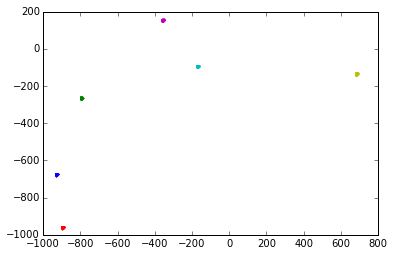

In [18]:
data,labels = generateData(1e2,2,6)

for c in np.unique(labels):
    c_data = data[np.where(labels==c)[0]]
    plt.plot(c_data[:,0],c_data[:,1],'.',label="data")

#plt.plot(data[:,0],data[:,1],'.')

In [15]:
labels

array([0, 0, 3, 5, 5, 2, 1, 3, 4, 2, 5, 1, 4, 2, 0, 4, 2, 0, 5, 3, 3, 0, 1,
       3, 0, 1, 3, 4, 1, 1, 2, 5, 4, 2, 4, 5, 0, 3, 0, 1, 0, 3, 2, 3, 1, 0,
       1, 2, 4, 4, 4, 4, 2, 1, 1, 5, 5, 4, 3, 0, 2, 1, 0, 3, 0, 3, 3, 0, 4,
       5, 2, 4, 2, 1, 2, 5, 2, 2, 4, 5, 1, 5, 5, 5, 5, 3, 1, 5, 2, 1, 1, 4,
       0, 0, 3, 0, 3, 4, 3, 2])

In [6]:
k=12
iters=100

In [19]:
#%%debug -b K_Means3.py:577n
reload(K_Means3)
grouperCUDA = K_Means()
grouperCUDA._centroid_mode="index"
grouperCUDA._cuda_mem="manual"
grouperCUDA.fit(data, k, iters=iters, mode="cuda", cuda_mem='manual',tol=1e-4,max_iters=300)

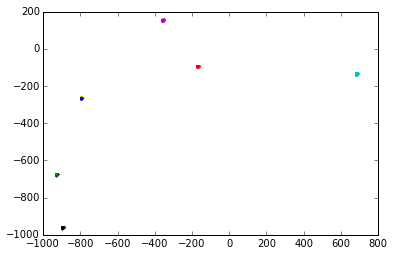

In [22]:
for c in np.unique(grouperCUDA.labels_):
    c_data = data[np.where(grouperCUDA.labels_==c)[0]]
    plt.plot(c_data[:,0],c_data[:,1],'.',label="data")

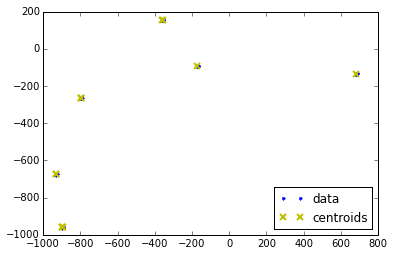

In [21]:
plt.plot(data[:,0],data[:,1],'.',label="data")
plt.plot(grouperCUDA.centroids[:,0],grouperCUDA.centroids[:,1],'yx',mew=2,label="centroids")
plt.legend(loc="best")

In [9]:
print grouperCUDA.centroids
print ""
for c in grouperCUDA.partition:
    print c
print ""
print grouperCUDA.labels_
print ""
print '# centroids:\t\t', len(np.unique(grouperCUDA.labels_))
print '# partition clusters:\t',len(grouperCUDA.partition)
print '# label clusters:\t',np.unique(grouperCUDA.labels_).size

def countSamples(partition):
    count=0
    for c in partition:
        count += c.size
    return count

print countSamples(grouperCUDA.partition)

[[ 992.56048584 -376.89523315]
 [ 774.58990479  712.4800415 ]
 [ -64.87361145 -448.95233154]
 [ -66.11804199 -447.28579712]
 [-460.16653442  -75.57642365]
 [-460.33969116  -77.38581085]
 [ 774.84820557  710.67041016]
 [ 422.27618408 -486.49133301]
 [ 992.40844727 -378.55599976]
 [-442.13818359 -521.44940186]]

[41 60 80 11 58 88 86 90  2 37 68]
[29 65 26 98 25 59 53 99 89]
[39 96 70 14 50]
[16 38 44 47 33 91 87 57 10 83 22 61]
[84 42 67 63 49 15 28]
[82 19 64  1 34 62 72 52 27]
[12 71  5 94 30 51 69]
[ 8 40 85 78 79 13 81  7 20 92 24 56 32 48 97 43  4]
[ 3 66 23  6 35  9]
[93 95 36 76 75 74 73 17 18 21 55 54 31 46 45 77  0]

[9 5 0 8 7 6 8 7 7 8 3 0 6 7 2 4 3 9 9 5 7 9 3 8 7 1 1 5 4 1 6 9 7 3 5 8 9
 0 3 2 7 0 4 7 3 9 9 3 7 4 2 6 5 1 9 9 7 3 0 1 0 3 5 4 5 1 8 4 0 6 2 6 5 9
 9 9 9 9 7 7 0 7 5 3 4 7 0 3 0 1 0 3 7 9 6 9 2 7 1 1]

# centroids:		10
# partition clusters:	10
# label clusters:	10
100
